Link to variable list:

https://www.nature.com/articles/sdata2018307/tables/3

https://www.nature.com/articles/sdata2018308

На будущее: Анализ коннектом - предсказание депрессии и личности из коннектом с помошью глубокого обучения



In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
# There are 2 sources for data. MPI_behaviour has cleaned up data for 200 participants, but not 
# the full data. MPI_behaviour2 has the full data, but missing metadata and some others. 

# General demographic and health information
metadata = pd.read_csv("MPI_behaviour/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")

# anthropometry and lab tests
anthropometry = pd.read_csv("MPI_behaviour/Medical_LEMON/Anthropometry/Anthropometry_LEMON.csv")
blood_tests = pd.read_csv("MPI_behaviour/Medical_LEMON/Blood Sample/Blood_Results_LEMON.csv")
blood_tests_info = open("MPI_behaviour/Medical_LEMON/Blood Sample/Blood_Results_info_LEMON", "r")
blood_pressure = pd.read_csv("MPI_behaviour/Medical_LEMON/Blood Pressure/Blood_Pressure_LEMON.csv")


# Personality tests
# Big 5 scores
NEO_FFI = pd.read_csv("MPI_behaviour/Emotion_and_Personality_Test_Battery_LEMON/NEO_FFI.csv")
NEO_FFI_info = open("MPI_behaviour/Emotion_and_Personality_Test_Battery_LEMON/NEO-FFI_info.txt", "r")
NEO_FFI_testalt = pd.read_csv("MPI_behaviour2/phenotype/NEO.tsv",sep='\t')

# Behavioural inhibition and behavioural approach systems (BIS/BAS) based on Gray
BISBAS = pd.read_csv("MPI_behaviour/Emotion_and_Personality_Test_Battery_LEMON/BISBAS.csv")

# Cognitive emotion regulation
emo_regulation = pd.read_csv("MPI_behaviour/Emotion_and_Personality_Test_Battery_LEMON/CERQ.csv")

# Mood state questionnaire on 3 days. GS = good/bad, WM = awake/tired, RU = calm/nervous
mood_day1 = pd.read_csv("MPI_behaviour/Emotion_and_Personality_Test_Battery_LEMON/MDBF_Day1.csv")
mood_day2 = pd.read_csv("MPI_behaviour/Emotion_and_Personality_Test_Battery_LEMON/MDBF_Day2.csv")
mood_day3 = pd.read_csv("MPI_behaviour/Emotion_and_Personality_Test_Battery_LEMON/MDBF_Day3.csv")

# Impulsivity scale
impulsivity = pd.read_csv("MPI_behaviour/Emotion_and_Personality_Test_Battery_LEMON/UPPS.csv")



# Cognitive tests
# Working memory
working_memory = pd.read_csv("MPI_behaviour/Cognitive_Test_Battery_LEMON/TAP_Working_Memory/TAP-Working Memory.csv")
working_memory_info = open("MPI_behaviour/Cognitive_Test_Battery_LEMON/TAP_Working_Memory/TAP-Working-Memory_info.txt", "r")

# Semantic and cognitive fluency
RWT = pd.read_csv("MPI_behaviour/Cognitive_Test_Battery_LEMON/RWT/RWT.csv")
RWT_info = open("MPI_behaviour/Cognitive_Test_Battery_LEMON/RWT/RWT_info.txt","r")




# Adult self report (related to DSM)
#ASR = pd.read_json("MPI_behaviour2/phenotype/ASR.json")
ASR = pd.read_csv("MPI_behaviour2/phenotype/ASR.tsv",sep='\t')

# beck depression inventory
BDI = pd.read_csv("MPI_behaviour2/phenotype/BDI.tsv",sep='\t')

# internet addiction test
IAT = pd.read_csv("MPI_behaviour2/phenotype/IAT.tsv",sep='\t')


# Mindfullness
mindfullness = pd.read_csv("MPI_behaviour2/phenotype/FFMQ.tsv",sep='\t')

# Metacognition. (thinking about thinking)
metacognition = pd.read_csv("MPI_behaviour2/phenotype/MCQ.tsv",sep='\t')

# Mind-wandering
mind_wandering = pd.read_csv("MPI_behaviour2/phenotype/SDMW.tsv",sep='\t')

# Inner speech
inner_speech = pd.read_csv("MPI_behaviour2/phenotype/VISQ.tsv",sep='\t')

# Attentional control 
control = pd.read_csv("MPI_behaviour2/phenotype/ACS.tsv",sep='\t')


# Creativity
alternative_uses = pd.read_csv("MPI_behaviour2/phenotype/AUT.tsv",sep='\t')
creative_achievement = pd.read_csv("MPI_behaviour2/phenotype/CAQ.tsv",sep='\t')
remote_associates = pd.read_csv("MPI_behaviour2/phenotype/RAT.tsv",sep='\t')
creative_imagery = pd.read_csv("MPI_behaviour2/phenotype/TCIA.tsv",sep='\t')

# Dark triad
dark_triad = pd.read_csv("MPI_behaviour2/phenotype/SD3.tsv",sep='\t')

# Personality style and disorder. German psychiatric test measuring subclinical manifestations of DSM-IV disorders.
# They are 
# PN - willful/paranoid
# SZ - reserved/schizoid
# ST - intuitive/schizotypal
# BL - spontaneous/borderline
# HI - charming/histrionic
# RH - optimistic/rhapsodic
# ZW - conscientious/compulsive
# AS - assertive/antisocial
# SU - self-critical/avoidant
# NA - ambitious/narcissistic
# AB - loyal/dependent
# NT - critical/negativistic
# SL - unselfish/self-sacrificing
# DP - I often feel low and feeble

PSSI = pd.read_csv("MPI_behaviour2/phenotype/PSSI.tsv",sep='\t')



In [3]:
# Cleaning and preparing dataset

# Lets put together all the psychometric data first. Should redo with a loop ;p

gender_age = metadata.iloc[:,[0,1,2]]
outer_join_test = gender_age.merge(NEO_FFI,on='ID',how='outer')
outer_join_test = outer_join_test.merge(BISBAS,on='ID',how='outer')
outer_join_test = outer_join_test.merge(emo_regulation,on='ID',how='outer')
outer_join_test = outer_join_test.merge(mood_day1,on='ID',how='outer')
outer_join_test = outer_join_test.merge(mood_day2,on='ID',how='outer')
outer_join_test = outer_join_test.merge(mood_day3,on='ID',how='outer')
outer_join_test = outer_join_test.merge(impulsivity,on='ID',how='outer')
outer_join_test = outer_join_test.merge(working_memory,on='ID',how='outer')
outer_join_test = outer_join_test.merge(RWT,on='ID',how='outer')

# Rename first column to match
ASR.rename(columns = {"participant_id": "ID"},inplace=True)
BDI.rename(columns = {"participant_id": "ID"},inplace=True)
IAT.rename(columns = {"participant_id": "ID"},inplace=True)
mindfullness.rename(columns = {"participant_id": "ID"},inplace=True)
metacognition.rename(columns = {"participant_id": "ID"},inplace=True)
mind_wandering.rename(columns = {"participant_id": "ID"},inplace=True)
inner_speech.rename(columns = {"participant_id": "ID"},inplace=True)
control.rename(columns = {"participant_id": "ID"},inplace=True)
alternative_uses.rename(columns = {"participant_id": "ID"},inplace=True)
creative_achievement.rename(columns = {"participant_id": "ID"},inplace=True)
remote_associates.rename(columns = {"participant_id": "ID"},inplace=True)
creative_imagery.rename(columns = {"participant_id": "ID"},inplace=True)
PSSI.rename(columns = {"participant_id": "ID"},inplace=True)

# Continue psychometric merge
outer_join_test = outer_join_test.merge(ASR,on='ID',how='outer')
outer_join_test = outer_join_test.merge(BDI,on='ID',how='outer')
outer_join_test = outer_join_test.merge(IAT,on='ID',how='outer')
outer_join_test = outer_join_test.merge(mindfullness,on='ID',how='outer')
outer_join_test = outer_join_test.merge(metacognition,on='ID',how='outer')
outer_join_test = outer_join_test.merge(mind_wandering,on='ID',how='outer')
outer_join_test = outer_join_test.merge(inner_speech,on='ID',how='outer')
outer_join_test = outer_join_test.merge(control,on='ID',how='outer')
outer_join_test = outer_join_test.merge(alternative_uses,on='ID',how='outer')
outer_join_test = outer_join_test.merge(creative_achievement,on='ID',how='outer')
outer_join_test = outer_join_test.merge(remote_associates,on='ID',how='outer')
outer_join_test = outer_join_test.merge(creative_imagery,on='ID',how='outer')
outer_join_test = outer_join_test.merge(PSSI,on='ID',how='outer')
psychometrics = outer_join_test

# Clean up ID column
zyu = psychometrics.ID.map(lambda ID: ID[-5:])
psychometrics['ID'] = zyu


# Dark triad was labelled differently. Now we can attach it.
dark_triad.rename(columns = {"ids": "ID"},inplace=True)
zyu2 = dark_triad.ID.map(lambda ID: str(ID))
dark_triad['ID'] = zyu2
psychometrics = psychometrics.merge(dark_triad,on='ID',how='outer')
psychometrics.sort_values(by='ID',inplace=True)
psychometrics.reset_index(drop=True,inplace=True)

# Lets put together all bio data (anthropometry and lab tests)

# Last row of blood test appear to be nonsense, so drop it
blood_tests = blood_tests.drop([228])

bio_outer_join = gender_age.merge(anthropometry,on='ID',how='outer')
#bio_outer_join = bio_outer_join.merge(anthropometry,on='ID',how='outer')
bio_outer_join = bio_outer_join.merge(blood_tests,on='ID',how='outer')
bio_outer_join = bio_outer_join.merge(blood_pressure,on='ID',how='outer')
biometrics = bio_outer_join
biometrics.sort_values(by='ID',inplace=True)
biometrics.reset_index(drop=True,inplace=True)

# Clean up ID column
zyu = biometrics.ID.map(lambda ID: ID[-5:])
biometrics['ID'] = zyu

# Combine them for some big analyses
all_data = psychometrics.merge(biometrics,on='ID',how='outer',suffixes=('','_y'))
all_data.sort_values(by='ID',inplace=True)
all_data.reset_index(drop=True,inplace=True)

# Drop duplicate columns
all_data.drop(columns=['Age_y','Gender_ 1=female_2=male_y'],inplace=True)

In [4]:
# Should rename many columns
all_data.rename(columns={'Gender_ 1=female_2=male' : 'Gender_1female_2male'},inplace=True)

In [5]:
# Save the data so that other analysis files are cleaner

#psychometrics.to_csv('psychometrics_v0.csv')
#biometrics.to_csv('biometrics_v0.csv')
#all_data.to_csv('all_data_v0.csv')

In [6]:
# Cleanup missing values. Better do that for specific experiments, as
# there is no consistent pattern with missing values.

# Easier to read this dataset with max_rows
pd.set_option("display.max_rows", None, "display.max_columns", None)

# How many missing values per column?

#psychometrics.isna().sum(axis=0)

# Option to drop some number of participants. Better do that for specific experiments, as
# there is no consistent pattern with missing values.

#psychometrics = psychometrics.iloc[0:228]
#biometrics = biometrics.iloc[0:228]
#all_data = all_data.iloc[0:228]

# Could delete column RWT_12 and RWT_24, as it has no data

#test3 = psychometrics.dropna(thresh = 50)

# Option to replace missing values with "None". Maybe not the best, messes with XGBoost. 

#psychometrics_NA = psychometrics.fillna("None")
#biometrics_NA=biometrics.fillna("None")
#all_data_NA= all_data.fillna("None")

Now we can investigate some patterns in the data. Lets look at psychometrics first. 


In [7]:
personality_test = psychometrics.loc[:,['Gender_ 1=female_2=male','Age','NEOFFI_Neuroticism','NEOFFI_Extraversion','NEOFFI_OpennessForExperiences','NEOFFI_Agreeableness','NEOFFI_Conscientiousness']]

# Gender? Men are slightly less everything.
personality_test.groupby(['Gender_ 1=female_2=male']).agg([np.mean])



,NEOFFI_Neuroticism,NEOFFI_Extraversion,NEOFFI_OpennessForExperiences,NEOFFI_Agreeableness,NEOFFI_Conscientiousness
,mean,mean,mean,mean,mean
Gender_ 1=female_2=male,,,,,
1.0,1.542708,2.483333,2.709375,2.846875,2.859375
2.0,1.468085,2.367612,2.677896,2.712766,2.576832


In [8]:
NEO_FFI.describe()

# In this sample, it seems that Neuroticism stands out. It has a lower minimum, a lower maximum, lower mean. 
# Could it be the most relevant trait?

,NEOFFI_Neuroticism,NEOFFI_Extraversion,NEOFFI_OpennessForExperiences,NEOFFI_Agreeableness,NEOFFI_Conscientiousness
count,221.000000,221.000000,221.000000,221.000000,221.000000
mean,1.495098,2.409502,2.689291,2.761312,2.679110
std,0.578504,0.521670,0.498663,0.433738,0.604541
min,0.166667,1.000000,1.583333,1.333333,0.666667
25%,1.083333,2.083333,2.333333,2.416667,2.250000
50%,1.416667,2.416667,2.666667,2.750000,2.750000
75%,1.916667,2.750000,3.083333,3.083333,3.083333
max,3.000000,3.916667,3.750000,3.916667,4.000000


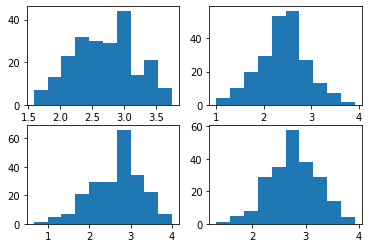

In [9]:
#NEO_FFI.shape

# Normality tests
# On first inspection data look approximately normal, but there is a lot of 3 out of 4 choices. 

plt.subplot(221)

plt.hist(NEO_FFI.NEOFFI_OpennessForExperiences)

plt.subplot(222)

plt.hist(NEO_FFI.NEOFFI_Extraversion)

plt.subplot(223)

plt.hist(NEO_FFI.NEOFFI_Conscientiousness)

plt.subplot(224)

plt.hist(NEO_FFI.NEOFFI_Agreeableness)


plt.show()

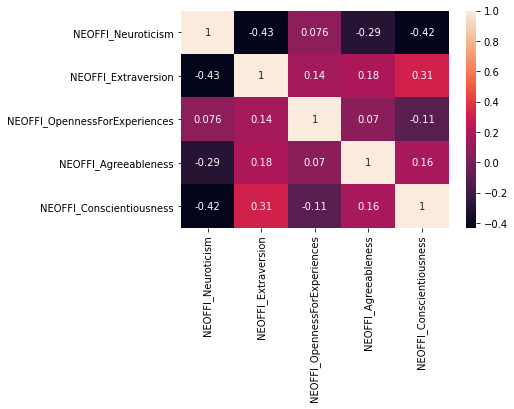

In [10]:
corr = NEO_FFI.corr()
sn.heatmap(corr, annot=True)
#sn.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sn.diverging_palette(220, 10, as_cmap=True),
            #square=True)
plt.show()


# Neuroticism and extraversion seem to be interacting again! Looks like Neuroticism is just poisonous..

In [11]:
print(blood_tests_info.read())


Blood Sample

Procedure
A blood sample of approximately 70 ml in total was taken on the first day after the acquisition of the MRI data. The blood was collected with four different types of sampling tubes: Serum, EDTA, Citrate and RNA. A part of the sample was directly sent on the day of drawing to the Institute for Laboratory Medicine, Clinical Chemistry and Molecular Diagnostics (ILM) of Medical Faculty at the Leipzig University, the remaining samples were stored for later use. One serum tube (S-Monovette® 7.5 ml, Sarstedt), one EDTA tube  (S-Monovette® 2.7 ml K3E, Sarstedt), and one citrate tube (S-Monovette® 3.0 ml 9NC, Sarstedt) were sent for direct analysis to the ILM. The remaining blood samples were divided into 10 microtainers of 2,0 ml size. Together with three EDTA tubes  (S-Monovette® 2.7 ml K3E, Sarstedt) and 2 RNA tubes (TempusTM , Applied Biosystems ) - containing  stabilization solution - the remaining blood samples were stored at -80° C for later use.
The date of blood

In [12]:
# Is the big 5 the same as BIS/BAS?

#corr = psychometrics.loc[:,['ID','BAS_Drive','BAS_Fun','BAS_Reward','BIS','NEOFFI_OpennessForExperiences','NEOFFI_Extraversion','NEOFFI_Conscientiousness','NEOFFI_Agreeableness','NEOFFI_Neuroticism']]
#corr = corr.corr()
#sn.heatmap(corr, annot=True)

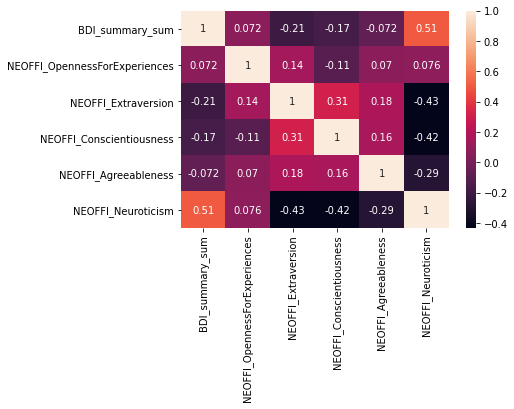

In [13]:
# Relationship between bog 5 traits and and depression. The biggest correlates from the big 5 are Neuroticism, 
# Extraversion, Conscientiousness, BAS_Drive and the behavioural inhibition system.

#corr = psychometrics.loc[:,['ID','BDI_summary_sum','BAS_Drive','BAS_Fun','BAS_Reward','BIS','NEOFFI_OpennessForExperiences','NEOFFI_Extraversion','NEOFFI_Conscientiousness','NEOFFI_Agreeableness','NEOFFI_Neuroticism']]
corr = psychometrics.loc[:,['ID','BDI_summary_sum','NEOFFI_OpennessForExperiences','NEOFFI_Extraversion','NEOFFI_Conscientiousness','NEOFFI_Agreeableness','NEOFFI_Neuroticism']]

corr = corr.corr()
sn.heatmap(corr, annot=True)

In [14]:
# What are the biggest correlates of depression?

psychometrics_corr = psychometrics.corr()

# Drop BDI scores
# Drop BDI columns too
cols = psychometrics_corr.columns
is_BDI = ['BDI' in x for x in cols]
drop_BDI_cols = cols[is_BDI]
psychometrics_corr = psychometrics_corr.drop(columns=drop_BDI_cols)

depression_corr = psychometrics_corr.loc[['BDI_summary_sum'],:]
depression_corr = depression_corr.transpose()

# What are the biggest correlates of schizophrenia? 
# Schizophrenic people are disagreeable, introverted, dont have functioning friends/ job,
# are withdrawn, 
print(depression_corr.sort_values(by='BDI_summary_sum').head(15))

print(depression_corr.sort_values(by='BDI_summary_sum',ascending = False).head(15))


                                               BDI_summary_sum
FFMQ_nonjudge_sum                                    -0.383632
ASR_summary_adaptiveFunctioning_spouse_sum           -0.331732
FFMQ_act_awareness_sum                               -0.330072
ASR_summary_adaptiveFunctioning_job_sum              -0.315498
ACS_sum                                              -0.311040
ASR_summary_adaptiveFunctioning_education_sum        -0.260126
PSSI_RH                                              -0.240022
Gender_ 1=female_2=male                              -0.234832
FFMQ_describe_sum                                    -0.222110
MDBF_Day3_GS_Scale                                   -0.215504
CERQ_positiveRefocusing                              -0.213524
MDBF_Day2_WM_Scale                                   -0.210339
MDBF_Day2_RU_Scale                                   -0.207449
NEOFFI_Extraversion                                  -0.206471
FFMQ_nonreact_sum                                    -0

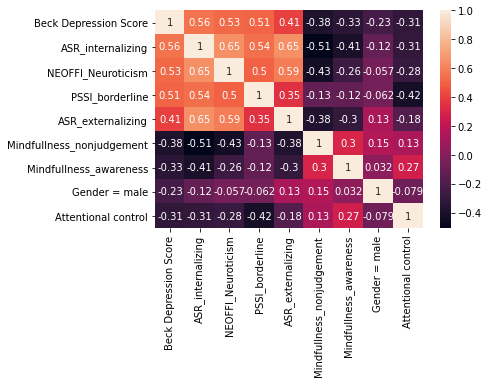

In [15]:
# Lets plot those instead

#corr = psychometrics.loc[:,['ID','BDI_summary_sum','BAS_Drive','BAS_Fun','BAS_Reward','BIS','NEOFFI_OpennessForExperiences','NEOFFI_Extraversion','NEOFFI_Conscientiousness','NEOFFI_Agreeableness','NEOFFI_Neuroticism']]
corr = psychometrics.loc[:,['ID','BDI_summary_sum','ASR_summary_syndromeProfiles_internalizing_sum','PSSI_BL','NEOFFI_Neuroticism','ASR_summary_syndromeProfiles_externalizing_sum','FFMQ_nonjudge_sum','FFMQ_act_awareness_sum','Gender_ 1=female_2=male','ACS_sum']]

corr.columns = ['ID','Beck Depression Score', 'ASR_internalizing','NEOFFI_Neuroticism', 'PSSI_borderline',
       'ASR_externalizing', 
       'Mindfullness_nonjudgement', 'Mindfullness_awareness',
       'Gender = male', 'Attentional control']

corr = corr.corr()

sn.heatmap(corr, annot=True)

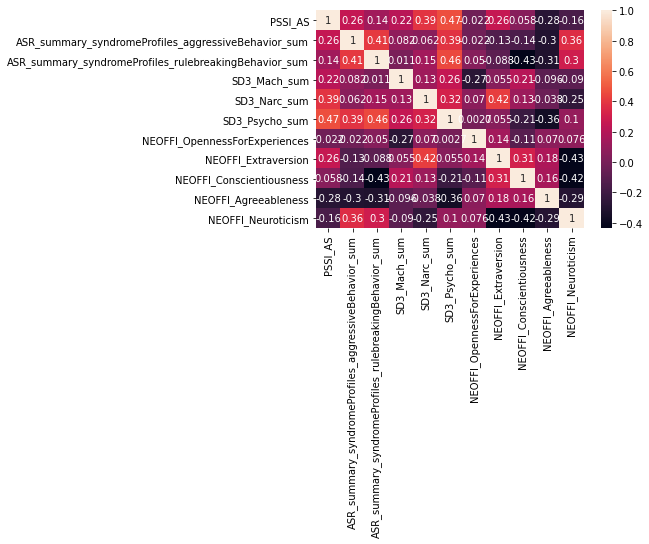

In [16]:
# Is there any way to predict agressive, antisocial or criminal behaviour from data?

# Anti-social disorder is correlated only with A
# Rule-breaking and agressive behaviour is correlated with psychopathy, neuroticism, consc., agreeableness, 
# Narcissism is related to extraversion :p and negatively related to neuroticism!
# Psychopathy is predicted by agreeableness and conscientiousness. 
# Machiavellianism is conservative?? -O +C

ASR_for_fraud = psychometrics.loc[:,['ID','PSSI_AS','ASR_summary_syndromeProfiles_aggressiveBehavior_sum', 'ASR_summary_syndromeProfiles_rulebreakingBehavior_sum','SD3_Mach_sum','SD3_Narc_sum','SD3_Psycho_sum','NEOFFI_OpennessForExperiences','NEOFFI_Extraversion','NEOFFI_Conscientiousness','NEOFFI_Agreeableness','NEOFFI_Neuroticism']]
ASR_for_fraud_corr = ASR_for_fraud.corr()
sn.heatmap(ASR_for_fraud_corr, annot=True)


In [17]:
# What are the biggest correlates of schizophrenia and schizotypy? 

#ASR_for_fraud = psychometrics.loc[:,['ID','PSSI_AS','ASR_summary_syndromeProfiles_aggressiveBehavior_sum', 'ASR_summary_syndromeProfiles_rulebreakingBehavior_sum','SD3_Mach_sum','SD3_Narc_sum','SD3_Psycho_sum','NEOFFI_OpennessForExperiences','NEOFFI_Extraversion','NEOFFI_Conscientiousness','NEOFFI_Agreeableness','NEOFFI_Neuroticism']]
psychometrics_corr = psychometrics.corr()

schizoid_corr = psychometrics_corr.loc[['PSSI_SZ','PSSI_ST'],:]
schizoid_corr = schizoid_corr.transpose()

# What are the biggest correlates of schizophrenia? 
# Schizophrenic people are disagreeable, introverted, dont have functioning friends/ job,
# are withdrawn, 
print(schizoid_corr.sort_values(by='PSSI_SZ').head(15))

print(schizoid_corr.sort_values(by='PSSI_SZ',ascending = False).head(15))

# What about schizotypy? 
# It appears different. Negatively correlated with verbal intelligence and fluency tests (RWT).
# Positvely correlated with bipolar, narcissistic, histrionic disorder?
print(schizoid_corr.sort_values(by='PSSI_ST').head(15))

print(schizoid_corr.sort_values(by='PSSI_ST',ascending = False).head(15))


                                              PSSI_SZ   PSSI_ST
NEOFFI_Extraversion                         -0.513236  0.166665
PSSI_RH                                     -0.434860  0.249831
PSSI_HI                                     -0.429756  0.244647
NEOFFI_Agreeableness                        -0.337574  0.114880
BAS_Fun                                     -0.324433  0.174449
ASR_summary_adaptiveFunctioning_friends_sum -0.263099  0.024293
FFMQ_describe_sum                           -0.235124  0.031003
FFMQ_nonjudge_sum                           -0.234453 -0.044301
ASR_summary_adaptiveFunctioning_job_sum     -0.231833  0.084438
UPPS_lack_premeditation                     -0.231724 -0.014681
RWT_5                                       -0.207295 -0.001897
AUT_Elaboration_mean                        -0.192302  0.070528
SD3_Narc_sum                                -0.189238  0.230411
UPPS_sens_seek                              -0.170230  0.137816
ASR_summary_adaptiveFunctioning_spouse_s

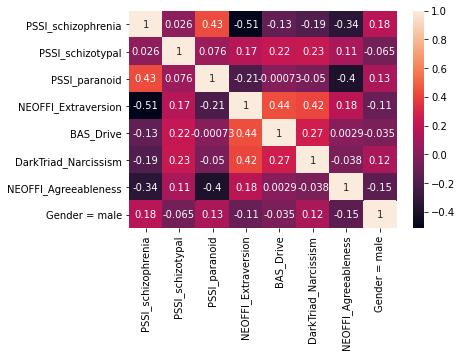

In [18]:
# Plot schizophrenic vs schizotypal. Split in two parts for readability. Part 1

corr = psychometrics.loc[:,['ID','PSSI_SZ','PSSI_ST','PSSI_PN','NEOFFI_Extraversion','BAS_Drive','SD3_Narc_sum','NEOFFI_Agreeableness','Gender_ 1=female_2=male']]

corr.columns = ['ID','PSSI_schizophrenia','PSSI_schizotypal','PSSI_paranoid','NEOFFI_Extraversion','BAS_Drive','DarkTriad_Narcissism','NEOFFI_Agreeableness','Gender = male']

corr = corr.corr()

sn.heatmap(corr, annot=True)

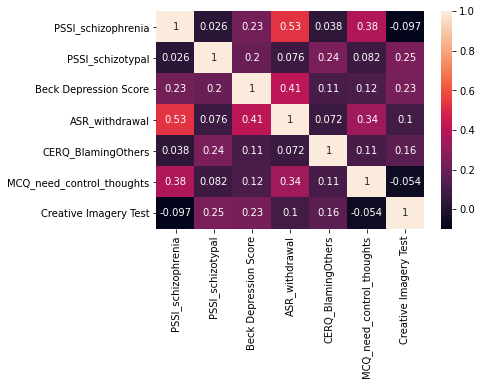

In [19]:
# Schizoid patterns part 2

corr = psychometrics.loc[:,['ID','PSSI_SZ','PSSI_ST','BDI_summary_sum','ASR_summary_syndromeProfiles_withdrawn_sum','CERQ_BlamingOthers','MCQ_need_contr_thoughts_mean','TCIA_Orig_mean']]

corr.columns = ['ID','PSSI_schizophrenia','PSSI_schizotypal','Beck Depression Score','ASR_withdrawal','CERQ_BlamingOthers','MCQ_need_control_thoughts','Creative Imagery Test']

corr = corr.corr()

sn.heatmap(corr, annot=True)






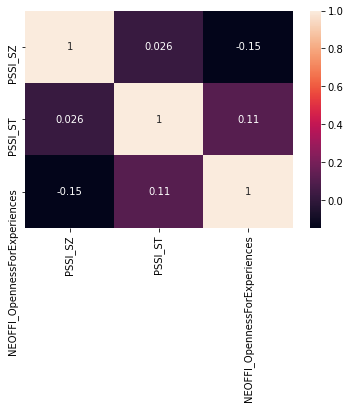

In [20]:
# Schizotypy related to openness and creativity

corr = psychometrics.loc[:,['ID','PSSI_SZ','PSSI_ST','NEOFFI_OpennessForExperiences']]

corr = corr.corr()

sn.heatmap(corr, annot=True)

In the following section we build gradient boosting models

In [21]:
#Lets build a gradient boosting model for predicting depression from lab tests

from sklearn.model_selection import train_test_split

X = biometrics.iloc[0:221,4:]

temp = psychometrics.iloc[0:221,:]
y = temp.BDI_summary_sum
# why are there still NaN values if I preprocessed?
#y = y.fillna("None")

# drop columns that are not float. Can recode them later. 
X = X.drop(columns=['Date_Blood_Drawing_LabAnalysis', 'ALAT_Reference_range', 'ASAT_Reference_range', 'HCT_Reference range', 'HGB_Reference range', 'HGBK_Reference range', 'MCHC_Reference range', 'MCHCK_Reference range', 'MCHK_Reference range', 'MCV_Reference range', 'MPV_Reference range', 'PLT_Reference range', 'RBC_Reference range', 'RDW_Reference range', 'WBC_Reference range', 'CHOL_Reference Range', 'CKDEPI_Reference range', 'CL_Rerefence range', 'CRE_Reference range', 'CRP_in_mg_l', 'CRP_Reference range', 'GGT_Reference range', 'GLU_Reference range', 'HBA1C_Reference range', 'HBA1CI_Rerefence range', 'HDLC_Reference range', 'K_Reference range', 'LDLC_Reference range', 'NA_Reference range', 'PT_Reference range', 'TRIG_Reference range', 'TSH_Reference range'])

# Drop NaN values from target
y_reduced = y.dropna()

# Remove rows from input that are now missing from target
nanrows = y[y.isnull()]
nanindex = nanrows.index
X_reduced = X.drop(nanindex,axis=0)

# 
X_train, X_valid, y_train, y_valid = train_test_split(X_reduced, y_reduced)


In [22]:
# lets investigate categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

[]


In [23]:
from xgboost import XGBRegressor
from xgboost import plot_importance

depression_model = XGBRegressor(n_estimators=500)
depression_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
from sklearn.metrics import mean_absolute_error

predictions = depression_model.predict(X_valid)

print("Mean Absolute Error: " + str(mean_absolute_error(y_valid,predictions)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(y_valid, predictions))

# Not so bad given that the standard deviation is 5.6!
print(psychometrics.BDI_summary_sum.describe())

Mean Absolute Error: 4.386946938037872


NameError: name 'r2_score' is not defined

In [ ]:
# What are the most important features in this model?

depression_model.feature_importances_

plot_importance(depression_model)
plt.figure(figsize=(30,20))
plt.show()

# plot
#plt.bar(range(len(depression_model.feature_importances_)), depression_model.feature_importances_)
#plt.show()
#1
#2
#3
# plot
#plt.bar(range(len(depression_model.feature_importances_)), depression_model.feature_importances_)
#plt.show()

In [ ]:
# Better method from Kaggle
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = depression_model.feature_importances_,
    x = X_train.columns,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = depression_model.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X_train.columns
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

What are those results?? 

1.HIGH(I think) levels of HDLC cholesterol are the strongest feature.

Low cholesterol is associated with type 1 diabetes and cardiovascular risk. 
High cholesterol associated with depression and also body mass index (confounding factor!).

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5371911/

2.Gamma-glutamyl transferase (GGT) was another predictior. GGT is a marker of liver damage. Could be hepatitis. 

3.White blood cell (WBC) count. I think it is also important. Immune conditions associated with depression. https://www.nature.com/articles/tp2016180

4.HGB in mmol. Hemoglobin levels are affected by SSRIs. 

In [ ]:
# Masha hypothesis. - Is blood pressure and platelet count related to personality? 
# Both are correlated with depression!

#a = biometrics.loc[:,['ID','BP1_left_diastole','BP1_right_diastole','BP1_right_systole','MPV_in_fl','MPV_Reference range', 'PLT_in_exp_9 _l', 'PLT_Reference range']]
#b = psychometrics.loc[:,['ID','BDI_summary_sum','NEOFFI_Extraversion','NEOFFI_Conscientiousness','NEOFFI_Agreeableness','NEOFFI_Neuroticism']]
#abc = a.merge(b,on='ID',how='outer')

#abc_corr = abc.corr()
#sn.heatmap(abc_corr, annot=True)


In [ ]:
# Lets conduct a PCA to reduce dimensionality in data

X = psychometrics.iloc[:,3:]

# Drop some problematic columns for now

dropcolumns = X.select_dtypes(include=['object']).columns

X.drop(columns=dropcolumns,inplace=True)

# Looks like PCA does not like NaN values. Dropping NAN by row or columns results in empty set.
# Lets try imputing values based on mean of the column. Of course this biases the data.
# Consider unbiased PCA instead. 

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(X)

X_trans = imp.transform(X)

X_trans = pd.DataFrame(X_trans)

X_trans.columns = X.columns

# It is also recommended to rescale the values to standardise them. 

X_standard = pd.DataFrame(StandardScaler().fit_transform(X_trans))
X_standard.columns = X.columns

#pca = PCA(n_components='mle')
pca = PCA(n_components=5)
X_transformed = pd.DataFrame(pca.fit_transform(X_trans))


In [ ]:
# What are the principal components?

# Lets try to interpret our components by looking at top correlates for them

# Create a correlation matrix between 5 components and our variables
components = X_transformed
component_corr = pd.concat([components, X_standard],axis=1)
component_corr = component_corr.corr()
component_corr = component_corr.iloc[:,:5] #.sort_values()

# Extract top correlates for each component
# component 1 appears to be related to working memory and RWT (words?)
component1_topcorr = component_corr.iloc[:,0]
component1_topcorr = component1_topcorr.loc[(component1_topcorr>=0.1)|(component1_topcorr<=-0.1)]

# component 2 appears to be related to control - conscientiousness,
#working memory, self-blame, premeditaiton, some depression items too
component2_topcorr = component_corr.iloc[:,1]
component2_topcorr = component2_topcorr.loc[(component2_topcorr>=0.1)|(component2_topcorr<=-0.1)]

# Component three appears to be an extraversion component. Related to some working memory tasks.
component3_topcorr = component_corr.iloc[:,2]
component3_topcorr = component3_topcorr.loc[(component3_topcorr>=0.1)|(component3_topcorr<=-0.1)]

# Component four appears to be the depression, agression and disorder component!

# Follows the neurotic pattern of the big 5: -N, -A, -C, -E, +O (interesting!)
# Correlates with self-blame, rumination, catastrophizing, bad refocusing, blaming others
# Correlates with worse mood in the mood questionnaire
# Correlates negatively with spouse, job and education
# With poor awareness, ability to refocus, mindfullness
# Interestingly correlates with some Openness and creativity measures. Also RWT. 
# Correlates with most or all disorders from PSSI, except RH and ZW
# Correlates with Psychopathy from the Dark Triad

component4_topcorr = component_corr.iloc[:,3]
component4_topcorr = component4_topcorr.loc[(component4_topcorr>=0.1)|(component4_topcorr<=-0.1)]

# Mystery component. Seems to be related to creativity and/or intelligence. 
# Very strong relationship with RWT.
# Negative relationships with disorders - BDI, ASR, PSSI

component5_topcorr = component_corr.iloc[:,4]
component5_topcorr = component5_topcorr.loc[(component5_topcorr>=0.1)|(component5_topcorr<=-0.1)]

#principal_components = pd.DataFrame(pca.components_)
#principal_components.columns = X.columns
#principal_components

In [ ]:
component5_topcorr

In [ ]:
# Lets predict the principal component scores from biometric data. Prepare the data.

from sklearn.model_selection import train_test_split

components['ID'] = psychometrics['ID']

dataprep = biometrics.merge(components,on='ID',how='outer')

# drop columns that are not float. Can recode them later. 
dataprep = dataprep.drop(columns=['Date_Blood_Drawing_LabAnalysis', 'ALAT_Reference_range', 'ASAT_Reference_range', 'HCT_Reference range', 'HGB_Reference range', 'HGBK_Reference range', 'MCHC_Reference range', 'MCHCK_Reference range', 'MCHK_Reference range', 'MCV_Reference range', 'MPV_Reference range', 'PLT_Reference range', 'RBC_Reference range', 'RDW_Reference range', 'WBC_Reference range', 'CHOL_Reference Range', 'CKDEPI_Reference range', 'CL_Rerefence range', 'CRE_Reference range', 'CRP_in_mg_l', 'CRP_Reference range', 'GGT_Reference range', 'GLU_Reference range', 'HBA1C_Reference range', 'HBA1CI_Rerefence range', 'HDLC_Reference range', 'K_Reference range', 'LDLC_Reference range', 'NA_Reference range', 'PT_Reference range', 'TRIG_Reference range', 'TSH_Reference range'])

# have to drop NaNs as regression doesnt like them. 

#dataprep = dataprep.dropna(axis='index')

# alternatively can try drop just from target, and impute values for X
target_column = dataprep.iloc[:,-2]
targetnan = y[y.isna()].index
dataprep = dataprep.drop(targetnan,axis=0)

#  THERE IS ALSO AN OPTION TO CENTER VARIABLES
X = dataprep.iloc[:,3:-5]

# Trying imputation for X
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(X)

X_trans = imp.transform(X)

X_trans = pd.DataFrame(X_trans)

X_trans.columns = X.columns

X = X_trans

# predicting our principal components. I think for now it is wise to choose just 1 component,
# component 4. 
y = dataprep.iloc[:,-2]

# split data for training the model
X_train, X_valid, y_train, y_valid = train_test_split(X, y,random_state=1)

In [ ]:
# Using linear regression. Performance is very bad. Consider standardising. 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fit the model
linear_regression = LinearRegression().fit(X_train, y_train)

# Predict the components based on biometrics
y_prediction = pd.DataFrame(linear_regression.predict(X_valid))

#print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_prediction))


#coefficients = pd.DataFrame(linear_regression.coef_)
#coefficients.columns = X_train.columns
#coefficients



In [ ]:
# Using decision tree. Decision tree performs better. 

from sklearn.tree import DecisionTreeRegressor

tree_regression = DecisionTreeRegressor(random_state=1)

tree_regression.fit(X_train, y_train)

# Predict the components based on biometrics
y_prediction = pd.DataFrame(tree_regression.predict(X_valid))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_prediction))

In [ ]:
# Using random forest. Random forest slightly worse than the decision tree. 

from sklearn.ensemble import RandomForestRegressor

RF_regression = RandomForestRegressor(random_state=1)

RF_regression.fit(X_train, y_train)

# Predict the components based on biometrics
y_prediction = pd.DataFrame(RF_regression.predict(X_valid))


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_prediction))

In [ ]:
# Using gradient boosting. Gradient boosting performs pretty well. 

from xgboost import XGBRegressor

XGB_regression = XGBRegressor(random_state=1,n_estimators=500)

XGB_regression.fit(X_train, y_train,early_stopping_rounds=5, 
             eval_set=[(X_train, y_train)],
             verbose=False)

# Predict the components based on biometrics
y_prediction = XGB_regression.predict(X_valid)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(y_valid, y_prediction))

In [ ]:
# Is this mean absolute error a big deal? compare to values component 4 can take

y.describe()
# 7.62 is way less than the standard deviation of 12
# Negative r^2 is a problem?

In [ ]:
# Great method from Kaggle for visualising importances

# Better method from Kaggle
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = XGB_regression.feature_importances_,
    x = X_train.columns,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = XGB_regression.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X_train.columns
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

The biggest predictors of component 4 appear to be:
1.Systolic and diastolic blood pressure
2.Pulse
3.Potassium in mmol
4.Cholesterol
5.Hemoglobin in blood
6.Triglycerides

In [ ]:
# What are the most important features for predicting component 4? 

top_features = pd.DataFrame(XGB_regression.feature_importances_).T
top_features.columns = X_train.columns
top_features = top_features.T
top_features.columns = ['importance']
top10_features = top_features.sort_values(by='importance',ascending=False).head(10)

In [ ]:

#
#plt.barh(top10_features,width=1)
#plt.show()

fig, ax = plt.subplots()

# Example data
feature_names = top10_features.index
y_pos = np.arange(len(top10_features))
importance = top10_features.values.tolist()
#importance = [10.12,8.34,6,4,2,1,0,1,4,5]
#importance = np.array(top10_features).T

ax.barh(y_pos, importance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [ ]:
objects
feature_names

In [ ]:
feature_names = top10_features.index
y_pos = np.arange(len(top10_features))

#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
#y_pos = np.arange(len(objects))

np.array(top10_features).T

In [ ]:
ax = top10_features.plot.barh(y='importance')

In [25]:
# Now lets predict Beck depression inventory scores
from sklearn.model_selection import train_test_split

dataprep = psychometrics.loc[:,['ID','BDI_summary_sum']]

dataprep = biometrics.merge(dataprep,on='ID',how='outer')

# drop columns that are not float. Can recode them later. 
dataprep = dataprep.drop(columns=['Date_Blood_Drawing_LabAnalysis', 'ALAT_Reference_range', 'ASAT_Reference_range', 'HCT_Reference range', 'HGB_Reference range', 'HGBK_Reference range', 'MCHC_Reference range', 'MCHCK_Reference range', 'MCHK_Reference range', 'MCV_Reference range', 'MPV_Reference range', 'PLT_Reference range', 'RBC_Reference range', 'RDW_Reference range', 'WBC_Reference range', 'CHOL_Reference Range', 'CKDEPI_Reference range', 'CL_Rerefence range', 'CRE_Reference range', 'CRP_in_mg_l', 'CRP_Reference range', 'GGT_Reference range', 'GLU_Reference range', 'HBA1C_Reference range', 'HBA1CI_Rerefence range', 'HDLC_Reference range', 'K_Reference range', 'LDLC_Reference range', 'NA_Reference range', 'PT_Reference range', 'TRIG_Reference range', 'TSH_Reference range'])

# have to drop NaNs as regression doesnt like them. 
dataprep = dataprep.dropna(axis='index')

# consider imputation

# Select all except BDI score
X = dataprep.iloc[:,3:-1]

# BDI score is our target
y = dataprep.iloc[:,-1]

# split data for training the model
X_train, X_valid, y_train, y_valid = train_test_split(X, y,random_state=1)

In [26]:
# Using linear regression. Performance is very bad. Consider standardising. 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fit the model
linear_regression = LinearRegression().fit(X_train, y_train)

# Predict the components based on biometrics
y_prediction = pd.DataFrame(linear_regression.predict(X_valid))

#print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_prediction))


#coefficients = pd.DataFrame(linear_regression.coef_)
#coefficients.columns = X_train.columns
#coefficients



Mean squared error: 30.14
Mean absolute error: 4.69
Coefficient of determination: -0.83


In [27]:
# Using decision tree. Decision tree performs better. 

from sklearn.tree import DecisionTreeRegressor

tree_regression = DecisionTreeRegressor(random_state=1)

tree_regression.fit(X_train, y_train)

# Predict the components based on biometrics
y_prediction = pd.DataFrame(tree_regression.predict(X_valid))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_prediction))

Mean squared error: 27.00
Mean absolute error: 3.75
Coefficient of determination: -0.64


In [28]:
# Using random forest. Random forest slightly worse than the decision tree. 

from sklearn.ensemble import RandomForestRegressor

RF_regression = RandomForestRegressor(random_state=1)

RF_regression.fit(X_train, y_train)

# Predict the components based on biometrics
y_prediction = pd.DataFrame(RF_regression.predict(X_valid))


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_prediction))

Mean squared error: 19.61
Mean absolute error: 4.01
Coefficient of determination: -0.19


In [29]:
# Using gradient boosting. Gradient boosting performs pretty well. 

from xgboost import XGBRegressor

XGB_regression = XGBRegressor(random_state=1,n_estimators=500)

XGB_regression.fit(X_train, y_train,early_stopping_rounds=5, 
             eval_set=[(X_train, y_train)],
             verbose=False)

# Predict the components based on biometrics
y_prediction = XGB_regression.predict(X_valid)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(y_valid, y_prediction))

Mean squared error: 17.77
Mean absolute error: 3.50
Coefficient of determination: -0.08


In [30]:
# What are the most important features for predicting component BDI scores? 

top_features = pd.DataFrame(XGB_regression.feature_importances_).T
top_features.columns = X_train.columns
top_features = top_features.T
top_features.columns = ['importance']
top10_features = top_features.sort_values(by='importance',ascending=False).head(10)

In [31]:
feature_names = top10_features.index
y_pos = np.arange(len(top10_features))

#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
#y_pos = np.arange(len(objects))

np.array(top10_features).T

array([[0.2569685 , 0.2248239 , 0.10160781, 0.09065532, 0.08870804,
        0.07035097, 0.04598931, 0.04281686, 0.02792859, 0.01241753]],
      dtype=float32)

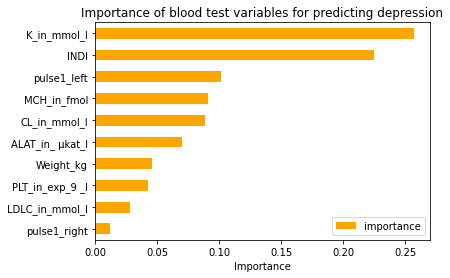

In [32]:
ax = top10_features.plot(kind='barh',y='importance',color='orange')
ax.set_xlabel('Importance')
ax.set_title('Importance of blood test variables for predicting depression')
ax.invert_yaxis()  # labels read top-to-bottom


In [37]:
top10_features.index

Index(['K_in_mmol_l', 'INDI', 'pulse1_left', 'MCH_in_fmol', 'CL_in_mmol_l',
       'ALAT_in_ µkat_l', 'Weight_kg', 'PLT_in_exp_9 _l', 'LDLC_in_mmol_l',
       'pulse1_right'],
      dtype='object')

In [41]:
# lest reduce number of features - maybe that will improve the algo?

# Now lets predict Beck depression inventory scores
from sklearn.model_selection import train_test_split

dataprep = psychometrics.loc[:,['ID','BDI_summary_sum']]

dataprep = biometrics.merge(dataprep,on='ID',how='outer')

# drop columns that are not float. Can recode them later. 
dataprep = dataprep.drop(columns=['Date_Blood_Drawing_LabAnalysis', 'ALAT_Reference_range', 'ASAT_Reference_range', 'HCT_Reference range', 'HGB_Reference range', 'HGBK_Reference range', 'MCHC_Reference range', 'MCHCK_Reference range', 'MCHK_Reference range', 'MCV_Reference range', 'MPV_Reference range', 'PLT_Reference range', 'RBC_Reference range', 'RDW_Reference range', 'WBC_Reference range', 'CHOL_Reference Range', 'CKDEPI_Reference range', 'CL_Rerefence range', 'CRE_Reference range', 'CRP_in_mg_l', 'CRP_Reference range', 'GGT_Reference range', 'GLU_Reference range', 'HBA1C_Reference range', 'HBA1CI_Rerefence range', 'HDLC_Reference range', 'K_Reference range', 'LDLC_Reference range', 'NA_Reference range', 'PT_Reference range', 'TRIG_Reference range', 'TSH_Reference range'])

# feature selection
dataprep = dataprep.loc[:,['K_in_mmol_l', 'INDI', 'pulse1_left', 'MCH_in_fmol', 'CL_in_mmol_l',
       'ALAT_in_ µkat_l', 'Weight_kg', 'PLT_in_exp_9 _l', 'LDLC_in_mmol_l',
       'pulse1_right','BDI_summary_sum']]

# have to drop NaNs as regression doesnt like them. 
dataprep = dataprep.dropna(axis='index')

# consider imputation

# Select all except BDI score
X = dataprep.iloc[:,:-1]

# BDI score is our target
y = dataprep.iloc[:,-1]

# split data for training the model
X_train, X_valid, y_train, y_valid = train_test_split(X, y,random_state=1)




In [44]:
# Using linear regression. Performance is much better!

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fit the model
linear_regression = LinearRegression().fit(X_train, y_train)

# Predict the components based on biometrics
y_prediction = pd.DataFrame(linear_regression.predict(X_valid))

#print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_prediction))


#coefficients = pd.DataFrame(linear_regression.coef_)
#coefficients.columns = X_train.columns
#coefficients



Mean squared error: 10.19
Mean absolute error: 2.56
Coefficient of determination: 0.18


In [45]:
# Using decision tree. Decision tree performs better. 

from sklearn.tree import DecisionTreeRegressor

tree_regression = DecisionTreeRegressor(random_state=1)

tree_regression.fit(X_train, y_train)

# Predict the components based on biometrics
y_prediction = pd.DataFrame(tree_regression.predict(X_valid))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_prediction))

Mean squared error: 27.73
Mean absolute error: 4.45
Coefficient of determination: -1.23


In [46]:
# Using random forest. Random forest slightly worse than the decision tree. 

from sklearn.ensemble import RandomForestRegressor

RF_regression = RandomForestRegressor(random_state=1)

RF_regression.fit(X_train, y_train)

# Predict the components based on biometrics
y_prediction = pd.DataFrame(RF_regression.predict(X_valid))


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_prediction))

Mean squared error: 14.80
Mean absolute error: 3.10
Coefficient of determination: -0.19


In [47]:
# Using gradient boosting. Gradient boosting performs pretty well. 

from xgboost import XGBRegressor

XGB_regression = XGBRegressor(random_state=1,n_estimators=500)

XGB_regression.fit(X_train, y_train,early_stopping_rounds=5, 
             eval_set=[(X_train, y_train)],
             verbose=False)

# Predict the components based on biometrics
y_prediction = XGB_regression.predict(X_valid)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_prediction))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, y_prediction))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(y_valid, y_prediction))

Mean squared error: 17.95
Mean absolute error: 3.51
Coefficient of determination: -0.44
